In [1]:
#We are applying a deep learning model on mnist dataset
#Digits dataset : 0,1,2, ..., 9 in the form of images

#Data load
#Preprocessing and Analyzing data
#Define model
#Compile model
#Model fit
#Evaluate model

In [2]:
from keras.datasets import mnist

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
#train_data, test_data = mnist.load_data() #unpacking
#(train_images, train_labels) = train_data #unpacking the train data
#(test_images, test_labels) = test_data

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #unpacking

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
from matplotlib.pyplot import imshow

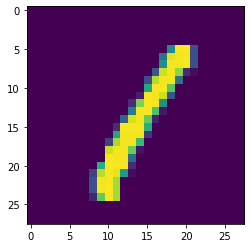

In [6]:
imshow(train_images[3].reshape(28,28))

In [33]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
train_labels[0]

5

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels.shape

(10000,)

In [12]:
from keras import models
from keras import layers

In [14]:
#This problem is multi-class classification

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#for multiclass classification problem:
#Last layer activation function -> softmax
#Loss function - Categorical crossentropy (for one hot encoded data) or sparse categorical cross entropy with no one-hot encoding

#Metrics
#For classification -> accuracy
#For regression -> MSE


In [16]:
train_images = train_images.reshape((60000, 28 * 28))   #Converting image to one-dimension
train_images = train_images.astype('float32') / 255     #Converting pixels between 0 and 1 i.e. normalization

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 17ms/step - loss: 0.2547 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1032 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0693 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0501 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0373 - accuracy: 0.9890


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0659 - accuracy: 0.9798


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9797999858856201


In [20]:
network.predict(train_images[3].reshape((1,28*28)))

array([[3.4371102e-09, 9.9998403e-01, 9.7562486e-07, 3.8255016e-07,
        2.6890419e-07, 4.8361315e-09, 1.9843291e-08, 8.7845183e-06,
        5.5264159e-06, 9.1031325e-09]], dtype=float32)

In [21]:
network.predict(train_images[3].reshape((1,28*28))).argmax()

1

In [22]:
#Let's do it in another way with one-hot encoded data

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
train_labels = to_categorical(train_labels)

In [28]:
test_labels = to_categorical(test_labels)

In [29]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
#This problem is multi-class classification

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 9s 18ms/step - loss: 0.2546 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1036 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0685 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0375 - accuracy: 0.9887


In [86]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
import numpy as np

In [35]:
salary = np.array([100, 110, 120]) #1D tensor

In [36]:
salary.ndim

1

In [37]:
#1.2 - O dimensional tensor
#[1,3,7] - 1 dimensional tensor

In [38]:
arr = np.array([[1,7,9],[3,4,5]]) #2D tensor

In [39]:
arr

array([[1, 7, 9],
       [3, 4, 5]])

In [40]:
arr.ndim

2

In [41]:
arr.shape

(2, 3)

In [42]:
arr.dtype

dtype('int32')

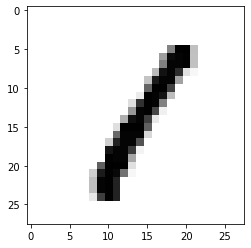

In [43]:
imshow(train_images[3].reshape(28,28), cmap='binary')

In [45]:
#Age, Pregnancies, Systolic, Disystolic
patients = np.array([
    [29,0,120,80],
    [39,1,129,89],
    [49,3,120,80]    
])

In [46]:
patients.shape

(3, 4)

In [47]:
patients[0,2]

120

In [59]:
from sklearn.feature_extraction.text import CountVectorizer #Import vetorizer from sklearn

In [66]:
#Vectorization - Convert textual data into vector form
#How to convert text documents to features

In [61]:
text = [
    "The stop_words_ attribute can get large and increase the model size when pickling. This attribute is provided only for introspection and can be safely removed using delattr or set to None before pickling.",
    "Learn vocabulary and idf, return document-term matrix.",
    "This is equivalent to fit followed by transform, but more efficiently implemented."
]

In [62]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)

In [69]:
vectorizer.get_feature_names()

['and',
 'attribute',
 'be',
 'before',
 'but',
 'by',
 'can',
 'delattr',
 'document',
 'efficiently',
 'equivalent',
 'fit',
 'followed',
 'for',
 'get',
 'idf',
 'implemented',
 'increase',
 'introspection',
 'is',
 'large',
 'learn',
 'matrix',
 'model',
 'more',
 'none',
 'only',
 'or',
 'pickling',
 'provided',
 'removed',
 'return',
 'safely',
 'set',
 'size',
 'stop_words_',
 'term',
 'the',
 'this',
 'to',
 'transform',
 'using',
 'vocabulary',
 'when']

In [71]:
X.data

array([2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [72]:
#TFIDF = Term frequency, inverse document frequency

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer #Import vetorizer from sklearn

In [75]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

In [76]:
X.data

array([0.15801753, 0.15801753, 0.1201764 , 0.15801753, 0.15801753,
       0.15801753, 0.15801753, 0.15801753, 0.15801753, 0.15801753,
       0.15801753, 0.15801753, 0.15801753, 0.15801753, 0.1201764 ,
       0.1201764 , 0.31603506, 0.15801753, 0.15801753, 0.15801753,
       0.15801753, 0.24035281, 0.15801753, 0.15801753, 0.31603506,
       0.31603506, 0.15801753, 0.31603506, 0.36325471, 0.36325471,
       0.36325471, 0.36325471, 0.36325471, 0.36325471, 0.36325471,
       0.27626457, 0.30520733, 0.30520733, 0.30520733, 0.30520733,
       0.30520733, 0.30520733, 0.30520733, 0.30520733, 0.30520733,
       0.23211804, 0.23211804, 0.23211804])

In [77]:
#Time series data

In [ ]:
#Weather data - temp, pressure, humidity

In [ ]:
1st sample
12:00 weather, temp, pressure
12:05 weather, temp, pressure
12:10 weather, temp, pressure

    
2nd sample
12:10 weather, temp, pressure
12:15 weather, temp, pressure
12:20 weather, temp, pressure

    
2nd sample
12:20 weather, temp, pressure
12:25 weather, temp, pressure
12:30 weather, temp, pressure
    

In [78]:
#Broadcasting

In [79]:
import numpy as np

In [80]:
X = np.array([1,3,7]) # 1D array #Expands dimension

In [81]:
Y = np.array([[1,1,1],
              [2,2,2]
             ]) #2D array

In [82]:
X+Y

array([[2, 4, 8],
       [3, 5, 9]])

In [ ]:
[1,3,7]
[1,3,7]

 +
    
[1,1,1]
[2,2,2]